In [30]:
import simulation
import pynbody
import numpy as np
import os
from luminosity import surface_brightness

In [2]:
paths = {62:"/home/michele/sim/ICs/mb.62002/p100_a800_r600/sim62002_snapshot_0065.gic",
         69:"/home/michele/sim/ICs/mb.69002/p100_a800_r600/sim69002_snapshot_0065.gic",
         71:"/home/michele/sim/ICs/mb.71002/p100_a800_r600/sim71002_snapshot_0065.gic"}

In [3]:
l = [pynbody.load(snap) for snap in paths.values()] 

In [4]:
s62, s69, s71 = l

In [5]:
for _s in l:
    pynbody.analysis.halo.center(_s.s)

In [6]:
def gas_star_mass_ratio(sf, filt=None):
    if filt is not None:
        s = sf[filt]
    else:
        s = sf
    return s.g['mass'].sum()/s.s['mass'].sum()

In [7]:
gm_sm62 = gas_star_mass_ratio(s62)
gm_sm62.view(np.ndarray)

array(439.79565, dtype=float32)

In [8]:
sphere = pynbody.filt.Sphere("8 kpc")

In [9]:
gm_sm62 = gas_star_mass_ratio(s62, sphere)
gm_sm62

SimArray(7.822348, dtype=float32, '1.00e+00')

In [69]:
[pynbody.analysis.luminosity.half_light_r(_s, band='k') for _s in l]

[SimArray(1.53555514, 'kpc'),
 SimArray(2.22896045, 'kpc'),
 SimArray(1.97955616, 'kpc')]

Cure properties to adjust virial radius

In [55]:
for _s in l:
    _s.properties['z'] = _s.header.redshift
    _s.properties['eps'] = 0.03

In [12]:
s69.properties

{'time': Unit("8.39e+00 s kpc km**-1"), 'a': 0.6583443798220391}

In [13]:
s62.properties['z'] = s62.header.redshift
s62.properties

{'time': Unit("8.39e+00 s kpc km**-1"), 'a': 0.6583450182419226}

In [14]:
[pynbody.analysis.halo.virial_radius(_s, rho_def='critical') for _s in l]

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaM0'=3.09e-01
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaL0'=6.91e-01
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'h'=6.78e-01
  name, value), RuntimeWarning)


[SimArray(32.44655419, 'kpc'),
 SimArray(53.01021377, 'kpc'),
 SimArray(49.15815043, 'kpc')]

In [15]:
width = "10 kpc"

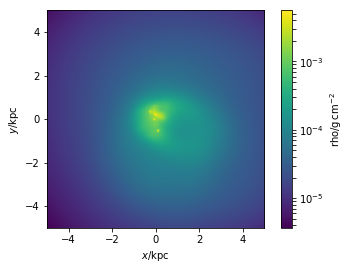

In [16]:
im = pynbody.plot.sph.image(s62.g[sphere], qty="rho", units="g cm^-2", show_cbar=True, width=width)

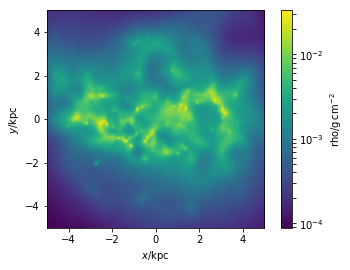

In [17]:
im = pynbody.plot.sph.image(s69.g, qty="rho", units="g cm^-2", show_cbar=True, width=width)

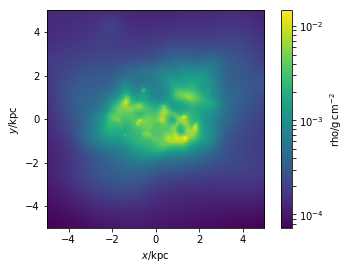

In [18]:
im = pynbody.plot.sph.image(s71.g, qty="rho", units="g cm^-2", show_cbar=True, width=width)

In [78]:
sphere = pynbody.filt.Sphere("2 kpc")
for _s in l:
    print(pynbody.analysis.luminosity.half_light_r(_s, band='v'))
for _s in l:
    print(os.path.basename(_s.filename), gas_star_mass_ratio(_s, sphere))

2.9375837445259094
2.3067148812115192
2.0812456868588924
sim62002_snapshot_0065.gic 4.163009
sim69002_snapshot_0065.gic 4.0095167
sim71002_snapshot_0065.gic 7.0273046


# Surface brightness

In [76]:
3/1.7

1.7647058823529411

In [75]:
s71.s['mass'].sum()

SimArray(0.00472849, dtype=float32, '1.00e+10 Msol')

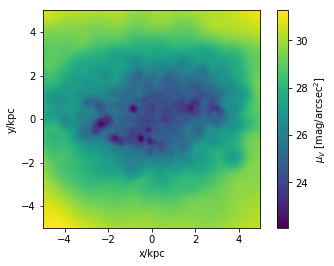

In [38]:
surface_brightness(s69[sphere]);

# Potential

In [61]:
r = np.linspace(0, 30)
pot = pynbody.gravity.calc.midplane_potential(s69, r)

In [62]:
import matplotlib.pyplot as plt

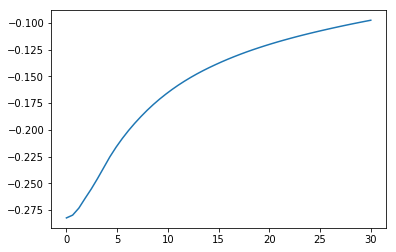

In [63]:
plt.plot(r, pot)

In [64]:
def potential(f, pos_vec, eps=None, unit=None):
    """
    from pynbody.aalysis.gravity
    Calculates the gravitational potential at the specified position
    using all particles in the specified snapshot.

    The gravitational softening length is determined by (in order of
    preference):
    1. The parameter eps (scalar, unit or array)
    2. The array f['eps']
    3. f.properties['eps'] (scalar or unit) 

    """

    if eps is None:
        try:
            eps = f['eps']
        except KeyError:
            eps = f.properties['eps']

    if isinstance(eps, str):
        eps = units.Unit(eps)

    if isinstance(eps, units.UnitBase):
        eps = eps.in_units(f['pos'].units, **f.conversion_context())

    d_pos = f['pos'] - pos_vec

    GM_by_r = units.G * f['mass'] / \
        ((d_pos ** 2).sum(axis=1) + eps ** 2) ** (1, 2)

    if unit is not None:
        GM_by_r.convert_units(unit)

    return -(GM_by_r.sum())

In [65]:
pynbody.analysis.profile.pot

<function pynbody.analysis.profile.pot(p)>